<a href="https://colab.research.google.com/github/gianfelipe93/titanic-spaceship/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [3]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         55           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        100           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        629           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        132           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1220           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14959            True  
house-pr

In [4]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 101MB/s]


In [5]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd 

train_path = "/content/train.csv"
test_path = "/content/test.csv"
raw_train_dataframe = pd.read_csv(train_path)
raw_test_dataframe = pd.read_csv(test_path)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup
from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.8.2


In [8]:
raw_train_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [9]:
eda_df = raw_train_dataframe.copy()

In [10]:
eda_df = eda_df.dropna()

In [11]:
eda_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [12]:
eda_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [ ]:
eda_df.groupby('VIP').sum()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
VIP,,,,,,,,
0,2315,184736.0,1417843.0,2854230.0,1141286.0,1942285.0,1807787.0,3267
1,17,6138.0,55240.0,309770.0,36937.0,126460.0,198984.0,60


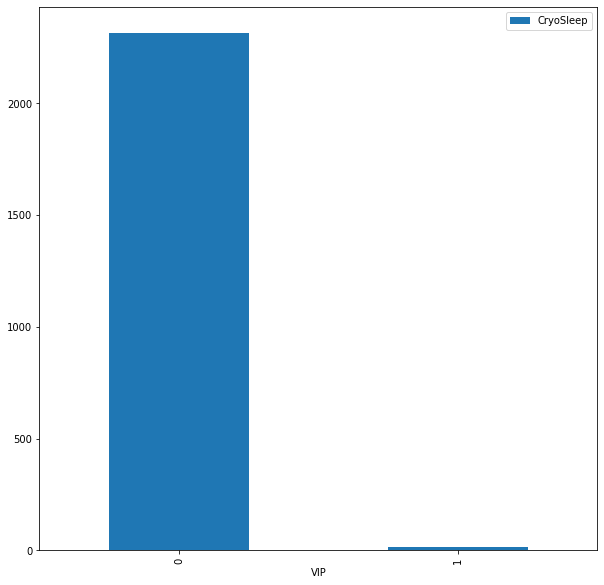

In [ ]:
eda_df.groupby('VIP').sum().plot(y='CryoSleep', kind="bar", figsize=(10, 10))

plt.show()

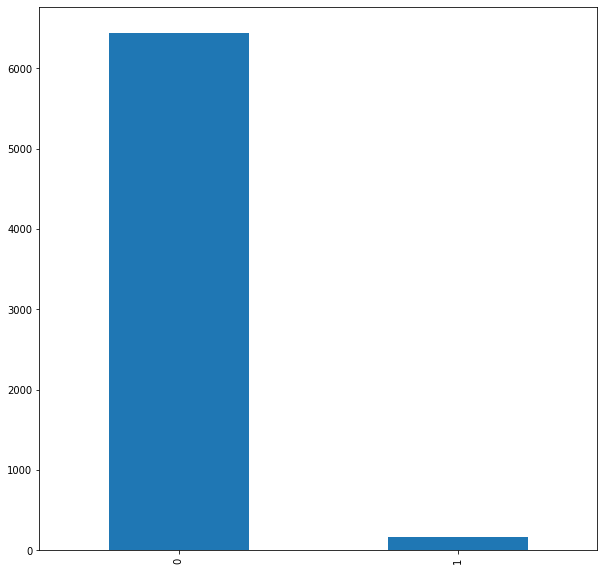

In [ ]:
eda_df['VIP'].value_counts().plot(y='CryoSleep', kind="bar", figsize=(10, 10))

In [ ]:
tst = raw_train_dataframe.copy()

In [ ]:
tst['VIP'].fillna(value=False, inplace=True)

In [ ]:
tst['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [ ]:
def set_cryoSleep(line):
  if line.VIP == 1:
    line.CryoSleep = 0
  else:
    line.CryoSleep = 1

  return line

In [ ]:
tst.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
tst = tst.apply(lambda x: set_cryoSleep(x), axis=1)

In [ ]:
tst.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
tst.tail(40)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8653,9231_01,Mars,1,F/1888/P,55 Cancri e,2.0,False,0.0,0.0,0.0,0.0,0.0,Denuts Paie,True
8654,9231_02,Mars,1,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True
8655,9231_03,Mars,1,E/592/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Cus Paie,False
8656,9233_01,Earth,1,NaN,TRAPPIST-1e,41.0,False,3.0,0.0,668.0,0.0,0.0,Royce Giller,True
8657,9234_01,Earth,1,G/1500/P,TRAPPIST-1e,49.0,False,6.0,1.0,638.0,1107.0,23.0,Catha Bushins,False
8658,9235_01,Earth,1,F/1789/S,TRAPPIST-1e,30.0,False,8.0,752.0,0.0,0.0,687.0,Joanny Burchrison,True
8659,9237_01,Earth,1,G/1488/S,TRAPPIST-1e,37.0,False,0.0,0.0,0.0,0.0,0.0,Philda Floways,False
8660,9239_01,Mars,1,E/593/P,TRAPPIST-1e,14.0,False,2.0,0.0,918.0,128.0,0.0,Per Minen,False
8661,9241_01,Mars,1,E/595/P,TRAPPIST-1e,30.0,False,699.0,0.0,600.0,0.0,0.0,Ants Fone,False
8662,9242_01,Earth,1,F/1891/P,TRAPPIST-1e,62.0,False,102.0,696.0,0.0,0.0,0.0,Dary Bakerrison,True


In [ ]:
eda_df['Destination'].value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [ ]:
raw_train_dataframe.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
raw_test_dataframe.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
len(raw_train_dataframe)

8693

#EDA

In [ ]:
train_eda_dataframe = raw_train_dataframe.copy()

In [ ]:
train_eda_dataframe = train_eda_dataframe.dropna()

In [ ]:
train_eda_dataframe["CryoSleep"] = train_eda_dataframe["CryoSleep"].astype(int)
train_eda_dataframe["VIP"] = train_eda_dataframe["VIP"].astype(int)
train_eda_dataframe["Age"] = train_eda_dataframe["Age"].astype(int)

train_eda_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,0,E/608/S,TRAPPIST-1e,44,0,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
raw_train_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
def setting_column_to_mode(dataframe, column):
  dataframe[column] = dataframe[column].fillna(dataframe[column].mode()[0])

  return dataframe

In [ ]:
def setting_column_to_mean(dataframe, column):
  dataframe[column] = dataframe[column].fillna(dataframe[column].transform('mean')).round(0)

  return dataframe

In [ ]:
train_dataframe = raw_train_dataframe.copy()
test_dataframe = raw_test_dataframe.copy()

In [ ]:
train_dataframe = setting_column_to_mode(train_dataframe, 'HomePlanet')
test_dataframe = setting_column_to_mode(test_dataframe, 'HomePlanet')

train_dataframe = setting_column_to_mode(train_dataframe, 'VIP')
test_dataframe = setting_column_to_mode(test_dataframe, 'VIP')

train_dataframe.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
train_dataframe = setting_column_to_mode(train_dataframe, 'CryoSleep')
test_dataframe = setting_column_to_mode(test_dataframe, 'CryoSleep')

In [ ]:
train_dataframe = setting_column_to_mode(train_dataframe, 'Age')
test_dataframe = setting_column_to_mode(test_dataframe, 'Age')

In [ ]:
train_dataframe = setting_column_to_mode(train_dataframe, 'RoomService')
test_dataframe = setting_column_to_mode(test_dataframe, 'RoomService')

In [ ]:
train_dataframe = setting_column_to_mode(train_dataframe, 'FoodCourt')
test_dataframe = setting_column_to_mode(test_dataframe, 'FoodCourt')

In [ ]:
train_dataframe = setting_column_to_mode(train_dataframe, 'ShoppingMall')
test_dataframe = setting_column_to_mode(test_dataframe, 'ShoppingMall')

In [ ]:
train_dataframe = setting_column_to_mode(train_dataframe, 'Spa')
test_dataframe = setting_column_to_mode(test_dataframe, 'Spa')

In [ ]:
train_dataframe = setting_column_to_mode(train_dataframe, 'VRDeck')
test_dataframe = setting_column_to_mode(test_dataframe, 'VRDeck')

In [ ]:
columns_to_drop=['Name']

In [ ]:
train_dataframe.groupby('Cabin')['Cabin'].count()

Cabin
A/0/P     2
A/0/S     2
A/1/S     3
A/10/P    1
A/10/S    1
         ..
T/0/P     1
T/1/P     1
T/2/P     1
T/2/S     1
T/3/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
columns_to_drop.append('Cabin')

In [ ]:
train_dataframe.groupby('Destination')['Destination'].count()

Destination
55 Cancri e      1800
PSO J318.5-22     796
TRAPPIST-1e      5915
Name: Destination, dtype: int64

In [ ]:
train_dataframe["Age"] = train_dataframe["Age"].astype(int)

train_dataframe['Age'].isna().sum()

0

In [ ]:
def put_age_in_bracket(age):
  if 0.0 <= age <= 12.99:
    return "Child"
  if 13.0 <= age <= 19.99:
    return "Teen"
  if 20.0 <= age <= 39.99:
    return "Young Adult"
  if 40.0 <= age <= 59.99:
    return "Mature Age"
  if age >= 60:
    return "Senior"

def create_age_buckets(age_dataframe):
  age_bucket_df = age_dataframe.apply(lambda row: put_age_in_bracket(row))

  return age_bucket_df

In [ ]:
train_dataframe['Age_Bucket'] = create_age_buckets(train_dataframe['Age'])
test_dataframe['Age_Bucket'] = create_age_buckets(test_dataframe['Age'])
columns_to_drop.append('Age')
train_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Bucket
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Mature Age
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Teen
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Young Adult
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Young Adult
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,Mature Age


In [ ]:
train_dataframe['RoomService'].describe()

count     8693.000000
mean       220.009318
std        660.519050
min          0.000000
25%          0.000000
50%          0.000000
75%         41.000000
max      14327.000000
Name: RoomService, dtype: float64

In [ ]:
def put_cost_in_bracket(cost):
  if cost == 0.0:
    return "Free"
  if 0.01 <= cost <= 99.99:
    return "Cheap"
  if 100.0 <= cost <= 499.99:
    return "Fairly Cheap"
  if 500.0 <= cost <= 899.99:
    return "Medium"
  if 900.0 <= cost <= 1199.99:
    return "Fairly Expensive"
  if cost >= 1200.00:
    return "Expensive"

def create_cost_buckets(cost_dataframe):
  cost_bucket_df = cost_dataframe.apply(lambda row: put_cost_in_bracket(row))

  return cost_bucket_df

In [ ]:
train_dataframe['RoomService_Bucket'] = create_cost_buckets(train_dataframe['RoomService'])
train_dataframe['FoodCourt_Bucket'] = create_cost_buckets(train_dataframe['FoodCourt'])
train_dataframe['ShoppingMall_Bucket'] = create_cost_buckets(train_dataframe['ShoppingMall'])
train_dataframe['Spa_Bucket'] = create_cost_buckets(train_dataframe['Spa'])
train_dataframe['VRDeck_Bucket'] = create_cost_buckets(train_dataframe['VRDeck'])
train_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Mature Age,Free,Expensive,Free,Expensive,Cheap
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Teen,Free,Free,Free,Free,Free
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Young Adult,Free,Free,Expensive,Cheap,Free
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Young Adult,Free,Fairly Expensive,Free,Fairly Cheap,Expensive
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,Mature Age,Fairly Cheap,Expensive,Free,Free,Cheap


In [ ]:
columns_to_drop.append('RoomService')
columns_to_drop.append('FoodCourt')
columns_to_drop.append('ShoppingMall')
columns_to_drop.append('Spa')
columns_to_drop.append('VRDeck')

In [ ]:
test_dataframe['RoomService_Bucket'] = create_cost_buckets(test_dataframe['RoomService'])
test_dataframe['FoodCourt_Bucket'] = create_cost_buckets(test_dataframe['FoodCourt'])
test_dataframe['ShoppingMall_Bucket'] = create_cost_buckets(test_dataframe['ShoppingMall'])
test_dataframe['Spa_Bucket'] = create_cost_buckets(test_dataframe['Spa'])
test_dataframe['VRDeck_Bucket'] = create_cost_buckets(test_dataframe['VRDeck'])
test_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,Young Adult,Free,Free,Free,Free,Free
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,Mature Age,Free,Medium,Cheap,Cheap,Fairly Cheap
4274,9271_01,Mars,True,D/296/P,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,Teen,Free,Free,Free,Free,Free
4275,9273_01,Europa,False,D/297/P,NaN,18.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,Teen,Free,Expensive,Free,Free,Medium
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,Mature Age,Free,Free,Free,Free,Free


In [ ]:
columns_to_drop

['Name',
 'Cabin',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [ ]:
train_dataframe= train_dataframe.drop(columns=columns_to_drop)
train_dataframe= train_dataframe.drop(columns=['PassengerId'])
train_dataframe.tail()


,HomePlanet,CryoSleep,Destination,VIP,Transported,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
8688,Europa,False,55 Cancri e,True,False,Mature Age,Free,Expensive,Free,Expensive,Cheap
8689,Earth,True,PSO J318.5-22,False,False,Teen,Free,Free,Free,Free,Free
8690,Earth,False,TRAPPIST-1e,False,True,Young Adult,Free,Free,Expensive,Cheap,Free
8691,Europa,False,55 Cancri e,False,False,Young Adult,Free,Fairly Expensive,Free,Fairly Cheap,Expensive
8692,Europa,False,TRAPPIST-1e,False,True,Mature Age,Fairly Cheap,Expensive,Free,Free,Cheap


In [ ]:
test_dataframe= test_dataframe.drop(columns=columns_to_drop)
test_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
4272,9266_02,Earth,True,TRAPPIST-1e,False,Young Adult,Free,Free,Free,Free,Free
4273,9269_01,Earth,False,TRAPPIST-1e,False,Mature Age,Free,Medium,Cheap,Cheap,Fairly Cheap
4274,9271_01,Mars,True,55 Cancri e,False,Teen,Free,Free,Free,Free,Free
4275,9273_01,Europa,False,NaN,False,Teen,Free,Expensive,Free,Free,Medium
4276,9277_01,Earth,True,PSO J318.5-22,False,Mature Age,Free,Free,Free,Free,Free


In [ ]:
test_dataframe["CryoSleep"] = test_dataframe["CryoSleep"].astype(int)
test_dataframe["VIP"] = test_dataframe["VIP"].astype(int)

train_dataframe["CryoSleep"] = train_dataframe["CryoSleep"].astype(int)
train_dataframe["VIP"] = train_dataframe["VIP"].astype(int)
train_dataframe["Transported"] = train_dataframe["Transported"].astype(int)

In [ ]:
train_dataframe.tail()

,HomePlanet,CryoSleep,Destination,VIP,Transported,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
8688,Europa,0,55 Cancri e,1,0,Mature Age,Free,Expensive,Free,Expensive,Cheap
8689,Earth,1,PSO J318.5-22,0,0,Teen,Free,Free,Free,Free,Free
8690,Earth,0,TRAPPIST-1e,0,1,Young Adult,Free,Free,Expensive,Cheap,Free
8691,Europa,0,55 Cancri e,0,0,Young Adult,Free,Fairly Expensive,Free,Fairly Cheap,Expensive
8692,Europa,0,TRAPPIST-1e,0,1,Mature Age,Fairly Cheap,Expensive,Free,Free,Cheap


In [ ]:
test_dataframe.tail()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Age_Bucket,RoomService_Bucket,FoodCourt_Bucket,ShoppingMall_Bucket,Spa_Bucket,VRDeck_Bucket
4272,9266_02,Earth,1,TRAPPIST-1e,0,Young Adult,Free,Free,Free,Free,Free
4273,9269_01,Earth,0,TRAPPIST-1e,0,Mature Age,Free,Medium,Cheap,Cheap,Fairly Cheap
4274,9271_01,Mars,1,55 Cancri e,0,Teen,Free,Free,Free,Free,Free
4275,9273_01,Europa,0,NaN,0,Teen,Free,Expensive,Free,Free,Medium
4276,9277_01,Earth,1,PSO J318.5-22,0,Mature Age,Free,Free,Free,Free,Free


In [ ]:
dummy_columns = ['HomePlanet', 'Destination', 'Age_Bucket', 'RoomService_Bucket', 'FoodCourt_Bucket', 'ShoppingMall_Bucket', 'Spa_Bucket', 'VRDeck_Bucket']

In [ ]:
train_dataframe = pd.get_dummies(train_dataframe, columns=dummy_columns, prefix_sep=["_","_","_","_","_","_","_","_"])
test_dataframe = pd.get_dummies(test_dataframe, columns=dummy_columns, prefix_sep=["_","_","_","_","_","_","_","_"])


In [ ]:
test_dataframe.tail()

,PassengerId,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age_Bucket_Child,...,Spa_Bucket_Fairly Cheap,Spa_Bucket_Fairly Expensive,Spa_Bucket_Free,Spa_Bucket_Medium,VRDeck_Bucket_Cheap,VRDeck_Bucket_Expensive,VRDeck_Bucket_Fairly Cheap,VRDeck_Bucket_Fairly Expensive,VRDeck_Bucket_Free,VRDeck_Bucket_Medium
4272,9266_02,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4273,9269_01,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4274,9271_01,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4275,9273_01,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4276,9277_01,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# train_x = pre_model_train_df.sample(frac=0.8,random_state=1) #random state is a seed value
train_x = train_dataframe.copy()
# val_x= pre_model_train_df.drop(train_x.index)

train_y = train_x['Transported']
# val_y = val_x['Transported']

train_x = train_x.drop(columns=['Transported'])
# val_x= val_x.drop(columns=['Transported'])

train_x = train_x.to_numpy()
train_y = train_y.to_numpy()

# val_x = val_x.to_numpy()
# val_y = val_y.to_numpy()


In [ ]:
len(train_x)

8693

In [ ]:
len(train_y)

8693

#Model

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') < 0.2):
      print("\nLoss is lower than 0.1 so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = Callback()

In [ ]:
model = tf.keras.Sequential()

input_layer = layers.Input(shape=(train_x.shape[1],))

hidden_layer_1 = layers.Dense(32, activation="relu", kernel_initializer="uniform") # hidden layer with 32 nodes, relu activation and uniform initialized weights
dropout_1 = layers.Dropout(0.5) #droput layer - drop half the nodes - prevents overfitting

hidden_layer_2 = layers.Dense(64, activation="relu", kernel_initializer="uniform") 
dropout_2 = layers.Dropout(0.5)

output_layer = layers.Dense(1, kernel_initializer="uniform", activation="sigmoid") #the output layer is a one node layer that gives a probablity

#put them all together
model.add(input_layer)
model.add(hidden_layer_1)
model.add(dropout_1)

model.add(hidden_layer_2)
model.add(dropout_2)

model.add(output_layer)

sgd = SGD(learning_rate=0.0005, momentum=0.6)

In [ ]:
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model_regulizer = tf.keras.Sequential()

input_layer = layers.Input(shape=(train_x.shape[1],))

hidden_layer_1 = layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)) # hidden layer with 32 nodes, relu activation and uniform initialized weights
dropout_1 = layers.Dropout(0.5) #droput layer - drop half the nodes - prevents overfitting

hidden_layer_2 = layers.Dense(64, activation="relu",  kernel_regularizer=tf.keras.regularizers.l2(0.0001)) 
dropout_2 = layers.Dropout(0.5)

output_layer = layers.Dense(1,  kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation="sigmoid") #the output layer is a one node layer that gives a probablity

#put them all together
model_regulizer.add(input_layer)
model_regulizer.add(hidden_layer_1)
model_regulizer.add(dropout_1)

model_regulizer.add(hidden_layer_2)
model_regulizer.add(dropout_2)

model_regulizer.add(output_layer)

sgd = SGD(learning_rate=0.0001, momentum=0.6)

In [ ]:
model_regulizer.compile(optimizer=sgd, loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

In [ ]:
es = keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=3,
        verbose=1,
    )

In [ ]:
history = model.fit(train_x, train_y, epochs=350, callbacks=[callbacks, es], verbose=0, validation_split=0.2, batch_size=20)

Epoch 4: early stopping


In [ ]:
history_regulizer = model_regulizer.fit(train_x, train_y, epochs=350, callbacks=[callbacks, es], verbose=0, validation_split=0.2, batch_size=15)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


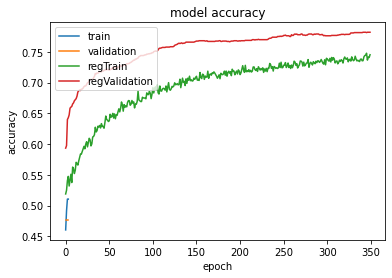

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_regulizer.history['accuracy'])
plt.plot(history_regulizer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'regTrain', 'regValidation'], loc='upper left')
plt.show()

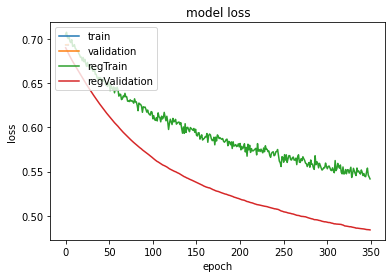

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_regulizer.history['loss'])
plt.plot(history_regulizer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'regTrain', 'regValidation'], loc='upper left')
plt.show()

In [ ]:
test_dataframe

,PassengerId,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age_Bucket_Child,...,Spa_Bucket_Fairly Cheap,Spa_Bucket_Fairly Expensive,Spa_Bucket_Free,Spa_Bucket_Medium,VRDeck_Bucket_Cheap,VRDeck_Bucket_Expensive,VRDeck_Bucket_Fairly Cheap,VRDeck_Bucket_Fairly Expensive,VRDeck_Bucket_Free,VRDeck_Bucket_Medium
0,0013_01,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0018_01,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0019_01,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0021_01,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0023_01,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4273,9269_01,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4274,9271_01,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4275,9273_01,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
test_copy = test_dataframe.copy()
test_copy = test_copy.drop(columns=['PassengerId'])
x_test = test_copy.to_numpy()

In [ ]:
x_test.shape

(4277, 43)

In [ ]:
preds = model.predict(x_test)

In [ ]:
preds = preds.reshape(4277)
for i in range(len(preds)):
    if preds[i]>0.5:
        preds[i] = True
    else:
        preds[i] = False

In [ ]:
submissionCol1 = raw_test_dataframe.PassengerId

In [ ]:
len(submissionCol1)

4277

In [ ]:
submission = pd.DataFrame({'PassengerId': submissionCol1.to_numpy(), 'Transported': preds})
submission.Transported = submission.Transported.astype(bool)
submission.set_index('PassengerId')

,Transported
PassengerId,
0013_01,True
0018_01,True
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,True
9271_01,True


In [ ]:
submission.to_csv('submission2.csv', index=False)
print("Submitted!")

Submitted!


In [ ]:
preds

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)